# 1.La quantification dans le contexte de traitement d'image

La **quantification** en traitement d'image est le processus qui convertit une gamme continue de valeurs (intensité des pixels) en un ensemble discret de valeurs.

### Impact sur les niveaux de gris :
La quantification réduit le nombre de niveaux de gris dans une image. Par exemple :
- **8 bits** : 256 niveaux de gris.
- **4 bits** : 16 niveaux de gris.
Moins il y a de niveaux, plus la qualité de l'image diminue, créant des effets de **postérisation**.

### Lien avec la profondeur de couleur :
La **profondeur de couleur** (bits par pixel) détermine le nombre de niveaux possibles :
- **1 bit** : 2 niveaux (noir et blanc).
- **8 bits** : 256 niveaux de gris.
Plus il y a de bits, plus l'image peut représenter de nuances.

# 2.Chargement d'une image en niveaux de gris

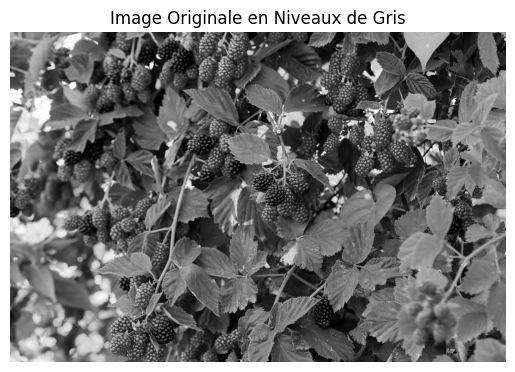

In [1]:
import cv2
import matplotlib . pyplot as plt
# Chargement de l’image en niveaux de gris
img = cv2.imread (r'C:\Users\Admin\Desktop\School\S5\Computer vision\TP1\raspberry.jpg', cv2 . IMREAD_GRAYSCALE )
plt.imshow ( img , cmap ='gray')
plt.title ('Image Originale en Niveaux de Gris')
plt.axis ('off') # Cacher les axes
plt.show ()

# 3.Quantification à différents niveaux de bits

In [2]:
import numpy as np
def quantize_image ( image , levels ):
    max_val = 255
    step = max_val // ( levels - 1)
    quantized_img = np . round ( image / step ) * step
    return quantized_img

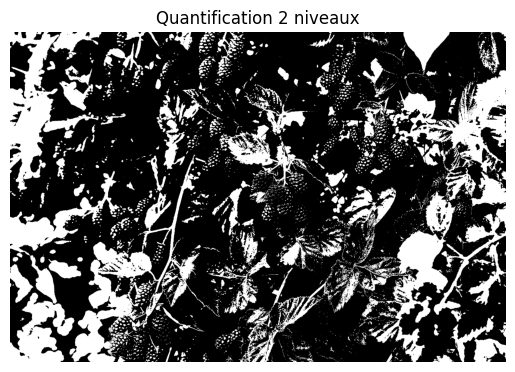

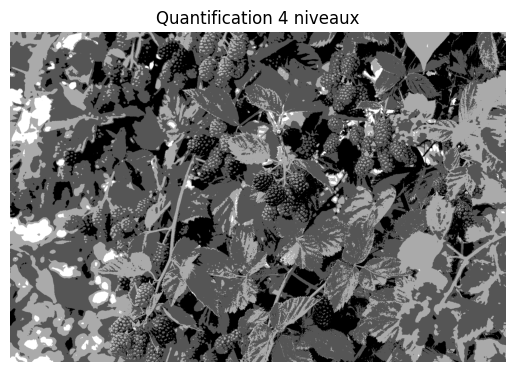

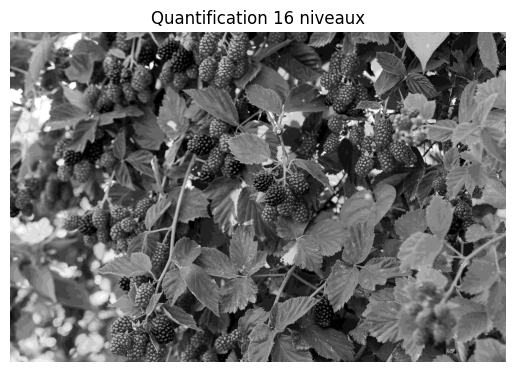

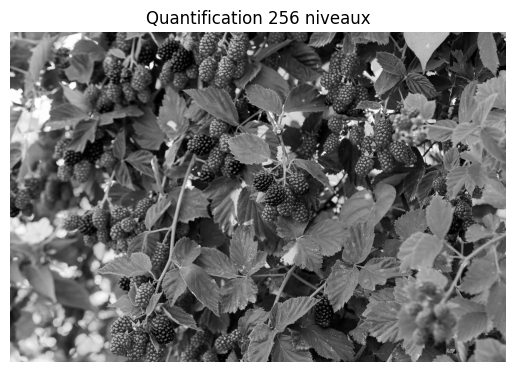

In [3]:
levels_list = [2 , 4 , 16 , 256]
for levels in levels_list :
    quantized_img = quantize_image ( img , levels )
    plt.imshow ( quantized_img , cmap ='gray')
    plt.title ( f'Quantification { levels } niveaux')
    plt.axis ('off') # Cacher les axes
    plt.show ()

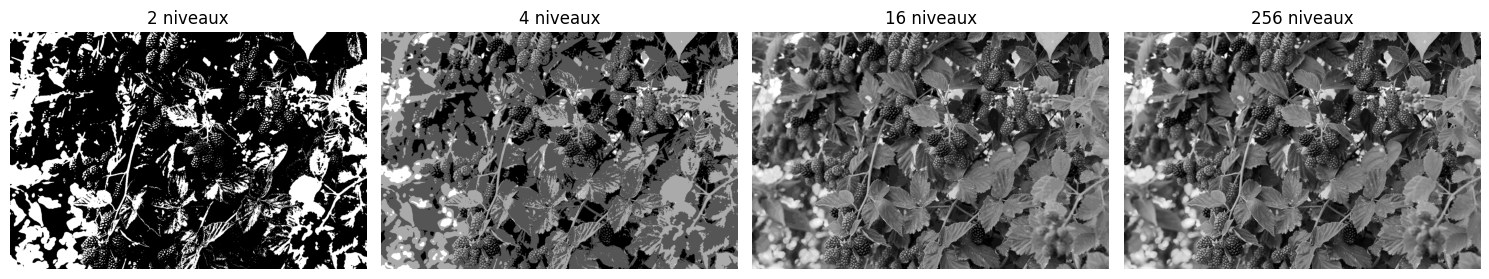

In [5]:
levels_list = [2 , 4 , 16 , 256]
# Create a figure with a horizontal arrangement of subplots
fig, axes = plt.subplots(1, len(levels_list), figsize=(15, 5))

# Loop through the levels and display the quantized images side by side
for i, levels in enumerate(levels_list):
    quantized_img = quantize_image(img, levels)
    axes[i].imshow(quantized_img, cmap='gray')
    axes[i].set_title(f'{levels} niveaux')
    axes[i].axis('off')  # Hide the axes

# Display all the subplots in one figure
plt.tight_layout()
plt.show()

# 4.Comparaison de la qualité des images quantifiées

Pour la **quantification d'image en 2 niveaux** on remarque que tous les détails subtils sont perdus, l'image est également fortement contrastée et les transition de teintes sont fortes.

D'autre part, la **quantification en 4 niveaux** engendre des transitions de teintes abruptes et l'effet de postérisation est encore présent. Cependant, on constate un peu plus de détails par rapport à 2 niveaux.

La **quantification en 16 niveaux** contient plus de détails et plus de nuances, mais certaines parties fines ou très détaillées peuvent encore manquer de précision. Les transitions sont plus douces qu'avec 4 niveaux, mais les contours sont encore peu pixelisés.

La **quantification en 256 niveaux de gris** l'image apparait pratiquement identique à l'image originale. 

In [6]:
from sklearn . metrics import mean_squared_error

for levels in levels_list :
 quantized_img = quantize_image ( img , levels )
 mse = mean_squared_error ( img . flatten () , quantized_img . flatten ())
 print ( f'Erreur quadratique moyenne pour { levels } niveaux : { mse :.2f}')

Erreur quadratique moyenne pour 2 niveaux : 7255.54
Erreur quadratique moyenne pour 4 niveaux : 669.29
Erreur quadratique moyenne pour 16 niveaux : 24.00
Erreur quadratique moyenne pour 256 niveaux : 0.00


1. **2 niveaux (7255.54)** : Avec seulement noir et blanc, l'image perd énormément de détails et de nuances, ce qui se traduit par une erreur très élevée.
2. **4 niveaux (669.29)** : L'image commence à avoir un peu plus de nuances, mais reste très simplifiée, entraînant encore une perte significative de qualité.
3. **16 niveaux (24.00)** : La qualité visuelle s'améliore considérablement. Les détails et les transitions de l'image sont bien mieux préservés, avec une différence minime par rapport à l'original.
4. **256 niveaux (0.00)** : L'image quantifiée est presque identique à l'originale, avec une erreur de 0, ce qui signifie qu'il n'y a aucune perte perceptible.

En résumé, plus le nombre de niveaux de gris augmente, moins il y a de perte de détails et meilleure est la qualité visuelle.

# 5.Analyse subjective

## À partir de quel niveau de quantification remarquez-vous une dégradation visible de la qualité de l’image ?

La dégradation visible de la qualité de l'image apparaît dès qu'on utilise 4 niveaux de gris. À ce stade, l'image devient trop simplifiée, avec une perte de détails et des transitions de teintes abruptes. Avec 2 niveaux, la qualité est encore plus dégradée, avec une image presque méconnaissable.

## Dans quelles applications est-il acceptable d’utiliser une image quantifiée à un faible nombre de niveaux de gris ?

Il est acceptable d'utiliser des images quantifiées à un faible nombre de niveaux de gris dans des applications où les détails visuels ne sont pas critiques, comme :
    Reconnaissance de formes basiques : pour les codes-barres ou les QR codes.
    Imagerie médicale simplifiée : pour détecter des zones de contraste élevé.
    Compression d'images : dans des contextes où la réduction de taille est plus importante que la qualité, comme pour les miniatures ou les aperçus.

# 6.Questions

## 1. Expliquer le lien entre le nombre de bits par pixel et la qualité de l'image
Le **nombre de bits par pixel** (bpp) détermine la profondeur de couleur d'une image, c'est-à-dire le nombre de valeurs distinctes pouvant être représentées pour chaque pixel. Voici comment ce lien se manifeste dans la qualité de l'image :

1. **Profondeur de couleur** :
    Plus le nombre de bits par pixel est élevé, plus il y a de niveaux de couleur ou de niveaux de gris possibles. Par exemple, un pixel de 8 bits peut afficher 256 valeurs différentes (0 à 255), tandis qu'un pixel de 24 bits (8 bits par canal pour le rouge, le vert et le bleu) peut afficher plus de 16 millions de couleurs.

2. **Nuances et détails** :
    Un plus grand nombre de bits permet de capturer davantage de nuances et de détails dans les images. Cela se traduit par des dégradés plus doux, des transitions de couleurs plus fluides et une meilleure représentation des variations subtiles dans les images.

3. **Effets de postérisation** :
    Lorsque le nombre de bits est faible, il y a un risque accru de **postérisation**, où les changements de couleur se produisent de manière brusque plutôt que fluide. Cela donne lieu à des zones de couleur uniforme, créant un effet visuel indésirable.

4. **Qualité globale** :
    En résumé, plus il y a de bits par pixel, meilleure est la qualité de l'image. Les images avec une profondeur de couleur plus élevée sont généralement plus riches, plus précises et plus fidèles à la réalité, tandis que les images avec une faible profondeur de couleur peuvent sembler aplaties ou dégradées. 

## 2. Dans quelle mesure l'erreur de quantification est-elle corrélée à la dégradation visuelle observée?
L'**erreur de quantification** est directement corrélée à la **dégradation visuelle** observée dans une image quantifiée. En effet, cette corrélation se manifeste par :

1. **Mesure de l'écart** :
    L'erreur de quantification quantifie la différence entre l'image originale et l'image quantifiée. Cette erreur est souvent mesurée par des métriques telles que l'erreur quadratique moyenne (MSE). Une erreur élevée indique une grande différence entre les pixels de l'image originale et ceux de l'image quantifiée, ce qui se traduit par une dégradation visuelle plus marquée.

2. **Perte de détails** :
    Lorsque le nombre de niveaux de gris ou de couleurs est réduit (quantification), certains détails subtils sont perdus. Plus le nombre de niveaux est faible, plus l'erreur de quantification est susceptible d'augmenter, entraînant une perte de textures, de nuances et de dégradés dans l'image. Cela se manifeste par des transitions abruptes et des zones de couleur uniformes, ce qui altère l'apparence générale de l'image.

3. **Postérisation** :
    Une forte erreur de quantification peut entraîner des effets de **postérisation**, où les changements de couleur sont trop brutaux. Cela est particulièrement visible dans les zones où il devrait y avoir des dégradés doux. Ce phénomène est directement lié à l'augmentation de l'erreur de quantification, car une diminution des niveaux de quantification augmente les écarts entre les valeurs de pixels adjacents.

4. **Perception humaine** :
    La dégradation visuelle est également influencée par la perception humaine. Même de petites erreurs dans les niveaux de quantification peuvent être perçues comme des artefacts visuels, réduisant ainsi la qualité perçue de l'image.


## 3.Quels sont les domaines où la quantification à bas niveaux peut être avantageuse ?

1. **Compression d'images** :
   - Dans des applications où la taille des fichiers est critique, comme pour le stockage et la transmission d'images sur le web, une quantification à bas niveaux permet de réduire la taille des fichiers, facilitant ainsi le partage et l'archivage.

2. **Applications en temps réel** :
   - Dans des systèmes de traitement d'images en temps réel (comme la vidéo en direct), utiliser une quantification à bas niveaux peut réduire le temps de traitement et la bande passante nécessaire, permettant ainsi un fonctionnement fluide sans nécessiter une grande puissance de calcul.

3. **Imagerie médicale simplifiée** :
   - Pour certaines analyses médicales, comme la détection de formes ou de contours dans des images, une quantification à bas niveaux peut suffire pour extraire des informations importantes sans avoir besoin de détails excessifs.

4. **Détection et reconnaissance de formes** :
   - Dans des systèmes de vision par ordinateur, comme ceux utilisés pour la reconnaissance de caractères (OCR) ou de codes-barres, une simplification des images via une faible quantification peut rendre ces processus plus efficaces.

5. **Visualisation de données** :
   - Pour certains types de visualisations de données, comme les graphiques ou les infographies, une quantification réduite peut suffire pour transmettre l'information sans nécessiter une représentation précise.

# Conclusion

La quantification des images a un impact significatif sur leur qualité, avec des résultats montrant que la réduction du nombre de niveaux de gris ou de couleurs entraîne une perte de détails et une dégradation visuelle, surtout à des niveaux de quantification très bas (2 à 4 niveaux). L'erreur de quantification, mesurée par des métriques telles que l'erreur quadratique moyenne, augmente avec la diminution des niveaux, ce qui se traduit par des artefacts visuels comme la postérisation. Cependant, une quantification à faible niveau peut être avantageuse dans des contextes où les contraintes de stockage et de transmission sont primordiales, telles que la compression d'images pour le web ou la vidéo en temps réel. Ainsi, il est essentiel de trouver un équilibre entre la qualité d'image requise et les limitations spécifiques de chaque application, en optant pour des niveaux de quantification plus élevés lorsque la fidélité visuelle est essentielle.